In [70]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [71]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [72]:
# Loading data
df_2018 = pd.read_sql("SELECT * FROM CocData WHERE year = 2018", con = conn)

df_2018.head()

,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,AK-500,1028,749,279,0,125,604,71,2018,AK-500 2018,1094,94,1000,290521.0,5.000000
1,AK-501,912,649,263,0,90,344,0,2018,AK-501 2018,922,215,707,426228.0,7.483333
2,AL-500,911,569,308,34,191,1768,0,2018,AL-500 2018,901,219,682,963666.0,3.333333
3,AL-501,435,298,137,0,60,203,0,2018,AL-501 2018,551,233,318,631763.0,4.150000
4,AL-502,210,102,108,0,0,50,0,2018,AL-502 2018,256,22,234,208656.0,4.150000


In [73]:
df_2018=df_2018.drop(['TotalHomeless', 'Sheltered', 'TotalBeds', 'CocYear', 'Coc', 'Year'], axis=1)

In [74]:
#df_2018['Unsheltered_div_pop'] = df_2018['Unsheltered'] / df_2018['Population']

In [75]:
#df_2018.head()

In [76]:
df_2018['Unsheltered_perc_pop'] = (df_2018['Unsheltered'] / df_2018['Population']) *100

In [77]:
df_2018.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop
0,749,279,0,125,604,71,94,290521.0,5.000000,0.032356
1,649,263,0,90,344,0,215,426228.0,7.483333,0.050442
2,569,308,34,191,1768,0,219,963666.0,3.333333,0.022726
3,298,137,0,60,203,0,233,631763.0,4.150000,0.036881
4,102,108,0,0,50,0,22,208656.0,4.150000,0.010544


In [78]:
df_2018['ES_beds_perc_pop'] = (df_2018['Emergency'] / df_2018['Population']) *100

In [79]:
df_2018['TS_beds_perc_pop'] = (df_2018['Transitional'] / df_2018['Population']) *100

In [80]:
df_2018['SH_beds_perc_pop'] = (df_2018['SafeHaven'] / df_2018['Population']) *100

In [81]:
df_2018['RRH_units_perc_pop'] = (df_2018['RapidRehousing'] / df_2018['Population']) *100

In [82]:
df_2018['RRH_units_perc_pop'] = (df_2018['RapidRehousing'] / df_2018['Population']) *100

In [83]:
df_2018['PSH_units_perc_pop'] = (df_2018['PermanentSupportive'] / df_2018['Population']) *100

In [84]:
df_2018['OPH_units_perc_pop'] = (df_2018['PermanentOther'] / df_2018['Population']) *100

In [85]:
df_2018.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,749,279,0,125,604,71,94,290521.0,5.000000,0.032356,0.257813,0.096034,0.000000,0.043026,0.207902,0.024439
1,649,263,0,90,344,0,215,426228.0,7.483333,0.050442,0.152266,0.061704,0.000000,0.021115,0.080708,0.000000
2,569,308,34,191,1768,0,219,963666.0,3.333333,0.022726,0.059045,0.031961,0.003528,0.019820,0.183466,0.000000
3,298,137,0,60,203,0,233,631763.0,4.150000,0.036881,0.047170,0.021685,0.000000,0.009497,0.032132,0.000000
4,102,108,0,0,50,0,22,208656.0,4.150000,0.010544,0.048884,0.051760,0.000000,0.000000,0.023963,0.000000


In [86]:
df_2018=df_2018.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered'], axis=1)

In [87]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            371 non-null    float64
 1   Unemployment          371 non-null    float64
 2   Unsheltered_perc_pop  371 non-null    float64
 3   ES_beds_perc_pop      371 non-null    float64
 4   TS_beds_perc_pop      371 non-null    float64
 5   SH_beds_perc_pop      371 non-null    float64
 6   RRH_units_perc_pop    371 non-null    float64
 7   PSH_units_perc_pop    371 non-null    float64
 8   OPH_units_perc_pop    371 non-null    float64
dtypes: float64(9)
memory usage: 26.2 KB


In [88]:
df_2018.head()

,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,290521.0,5.000000,0.032356,0.257813,0.096034,0.000000,0.043026,0.207902,0.024439
1,426228.0,7.483333,0.050442,0.152266,0.061704,0.000000,0.021115,0.080708,0.000000
2,963666.0,3.333333,0.022726,0.059045,0.031961,0.003528,0.019820,0.183466,0.000000
3,631763.0,4.150000,0.036881,0.047170,0.021685,0.000000,0.009497,0.032132,0.000000
4,208656.0,4.150000,0.010544,0.048884,0.051760,0.000000,0.000000,0.023963,0.000000


In [89]:
# Define the features set.
X = df_2018.copy()
X = X.drop("Unsheltered_perc_pop", axis=1)
X.head()

,Population,Unemployment,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,290521.0,5.000000,0.257813,0.096034,0.000000,0.043026,0.207902,0.024439
1,426228.0,7.483333,0.152266,0.061704,0.000000,0.021115,0.080708,0.000000
2,963666.0,3.333333,0.059045,0.031961,0.003528,0.019820,0.183466,0.000000
3,631763.0,4.150000,0.047170,0.021685,0.000000,0.009497,0.032132,0.000000
4,208656.0,4.150000,0.048884,0.051760,0.000000,0.000000,0.023963,0.000000


In [90]:
# Define the target set.
y = df_2018["Unsheltered_perc_pop"].ravel()
y[:5]

array([0.03235566, 0.05044249, 0.02272572, 0.03688092, 0.01054367])

In [91]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [92]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [93]:
reg_model = regr.fit(X, y)

In [94]:
importances = reg_model.feature_importances_
importances

array([0.15418288, 0.2410334 , 0.0928809 , 0.35604134, 0.00313233,
       0.04566351, 0.10055011, 0.00651551])

In [95]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.35604134333435844, 'TS_beds_perc_pop'),
 (0.24103340349106311, 'Unemployment'),
 (0.1541828778567609, 'Population'),
 (0.10055011426558567, 'PSH_units_perc_pop'),
 (0.0928808998394602, 'ES_beds_perc_pop'),
 (0.045663513830546655, 'RRH_units_perc_pop'),
 (0.006515512781316709, 'OPH_units_perc_pop'),
 (0.003132334600908228, 'SH_beds_perc_pop')]

In [96]:
%matplotlib inline
from matplotlib import pyplot as plt

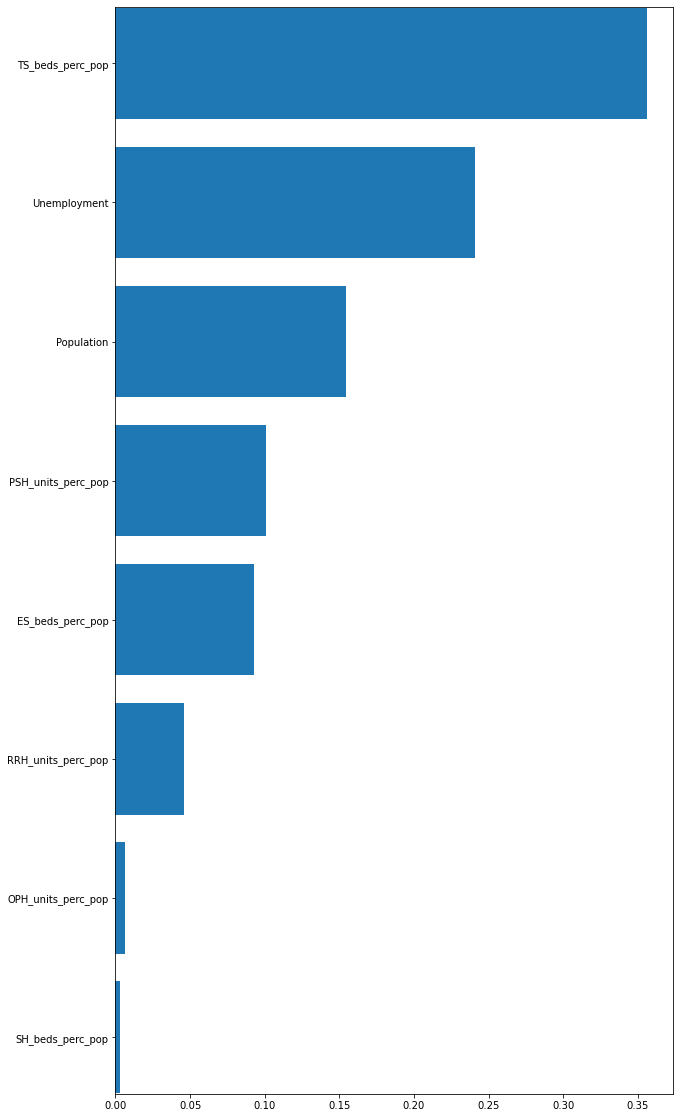

In [97]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [98]:
estimator = reg_model.estimators_[5]

[Text(0.625, 0.875, 'X[1] <= 13.825\nsquared_error = 0.007\nsamples = 234\nvalue = 0.052'),
 Text(0.5, 0.625, 'X[3] <= 0.065\nsquared_error = 0.006\nsamples = 233\nvalue = 0.05'),
 Text(0.25, 0.375, 'X[1] <= 7.104\nsquared_error = 0.003\nsamples = 198\nvalue = 0.036'),
 Text(0.125, 0.125, 'squared_error = 0.002\nsamples = 193\nvalue = 0.034'),
 Text(0.375, 0.125, 'squared_error = 0.002\nsamples = 5\nvalue = 0.108'),
 Text(0.75, 0.375, 'X[1] <= 5.725\nsquared_error = 0.02\nsamples = 35\nvalue = 0.133'),
 Text(0.625, 0.125, 'squared_error = 0.018\nsamples = 33\nvalue = 0.12'),
 Text(0.875, 0.125, 'squared_error = 0.012\nsamples = 2\nvalue = 0.355'),
 Text(0.75, 0.625, 'squared_error = -0.0\nsamples = 1\nvalue = 0.734')]

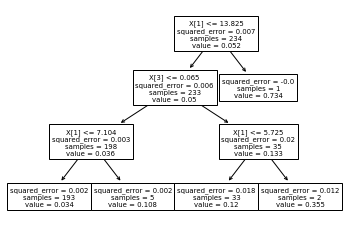

In [99]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [100]:
df_2018.to_csv('2018_converted.csv', index=False)